# Understanding Linear Regression

First, import numpy and matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
plt.style.use('..\class14\\astr19-matplotlib-defaults.txt')

Now, generate some random data about a trend line

In [11]:
#set a random number seed
np.random.seed(19)

#set number of data points 
npoints = 50

#set x
x = np.linspace(0, 10., npoints)

#set slope, intercepts, and scatter rms
m =2.0
b = 1.0
sigma =2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma, size= npoints)
y_err = np.full(npoints, sigma)

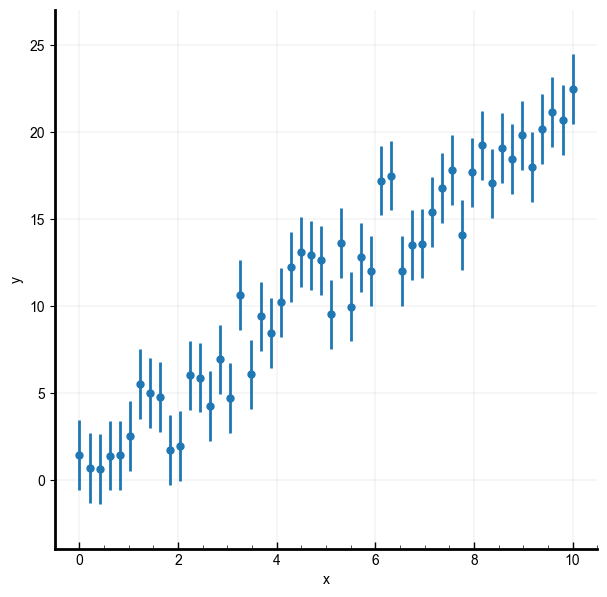

In [12]:
f = plt.figure(figsize= (7,7))
plt.errorbar(x, y, yerr= y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Method 1: polyfit()

In [13]:
m_fit, b_fit, x = np.poly1d(np.polyfit(x, y, 1, w = 1.0/y_err)) # w is weight (uncertainty)
print(m_fit, b_fit)

-0.031361129337884354 2.4088248393534095 0.21405118272319365


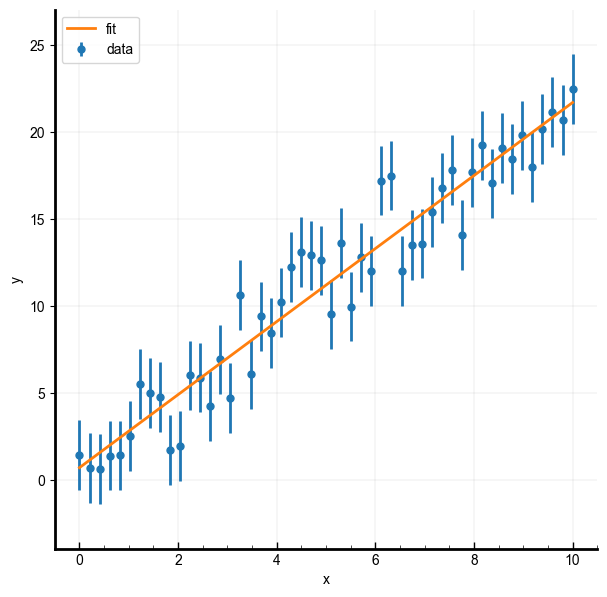

In [8]:
y_fit = m_fit*x + b_fit
f = plt.figure(figsize= (7,7))
plt.errorbar(x, y, yerr= y_err, fmt='o', zorder=5, label='data')
plt.plot(x, y_fit, zorder=6, label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=True)
plt.show()

Is this really the best fit?

In [9]:
x_mean = np.mean(x)
y_mean = np.mean(y)

sum_numerator = np.sum((x-x_mean) * (y-y_mean))
sum_denominator = np.sum((x-x_mean)**2)

m_calc = sum_numerator / sum_denominator
b_calc = y_mean - m_calc * x_mean

y_calc = m_calc * x + b_calc

print(m_calc, b_fit)

2.0952135459745644 0.7260696208927416


Why is the last digit different?

In [15]:
print(1/3)
print(1/3 + 1/3)
print(1/3 + 1/3 + 1/3)

print(1/3 + 1/3 + 1/3 + 1/3 + 1/3 + 1/3)
print((1/3 + 1/3 + 1/3) + (1/3 + 1/3 + 1/3))

0.3333333333333333
0.6666666666666666
1.0
1.9999999999999998


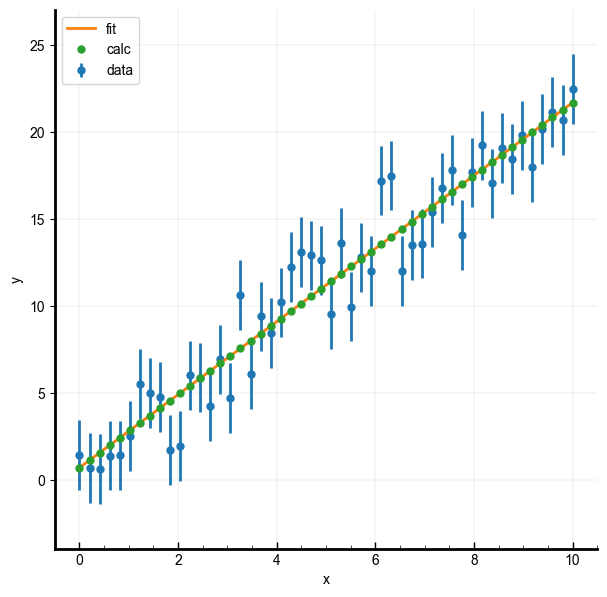

In [16]:
f = plt.figure(figsize= (7,7))
plt.errorbar(x, y, yerr= y_err, fmt='o', zorder=5, label='data')
plt.plot(x, y_fit, zorder=6, label='fit')
plt.plot(x, y_calc, 'o', zorder=7, label='calc')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=True)
plt.show()